<a href="https://colab.research.google.com/github/ezinneanne/mnist-task/blob/new_branch/Anti_spam_mail_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop your own anti-spam program or classifier.
- Download examples of spam from Google.

- Extract the data set.

- Divide the data set into training for a test set.

- Write a program to convert every email to a feature vector.

- Play with the classifiers, and try to construct the best one possible, with
high values for recall and precision.

In [ ]:
# Mounting gdrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#importing libraries
import pandas as pd

In [ ]:
# Set parameters
DATA_DIR = '/content/drive/MyDrive/'


# Reading the dataset
data = pd.read_csv(DATA_DIR + 'spam.csv', encoding='latin1')
# display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Determine the percentage of missing value in each column
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage

,0
v1,0.000000
v2,0.000000
Unnamed: 2,99.102656
Unnamed: 3,99.784637
Unnamed: 4,99.892319


In [ ]:
#drop unnamed 2,3, and 4 columns
data.drop(columns=['Unnamed: 2'], inplace=True)
data.drop(columns=['Unnamed: 3'], inplace=True)
data.drop(columns=['Unnamed: 4'], inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:

#rename columns v1 and v2 to label and text
data.columns = ['label', 'text']
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   text       5572 non-null   object
 2   label_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#preprocess the text
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # remove non-word characters
    return text

data['clean_text'] = data['text'].apply(preprocess_text)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   text        5572 non-null   object
 2   label_num   5572 non-null   int64 
 3   clean_text  5572 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.3+ KB


,label,text,label_num,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i don t think he goes to usf he lives arou...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,0,will ì_ b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i d...


In [ ]:

#transforming to a feature vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['clean_text'])
y = data['label_num']

In [ ]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

# SVM (Linear)
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_metrics(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

nb_metrics = get_metrics(y_test, y_pred)         # From Naive Bayes
log_metrics = get_metrics(y_test, log_pred)      # From Logistic Regression
svm_metrics = get_metrics(y_test, svm_pred) # From SVM

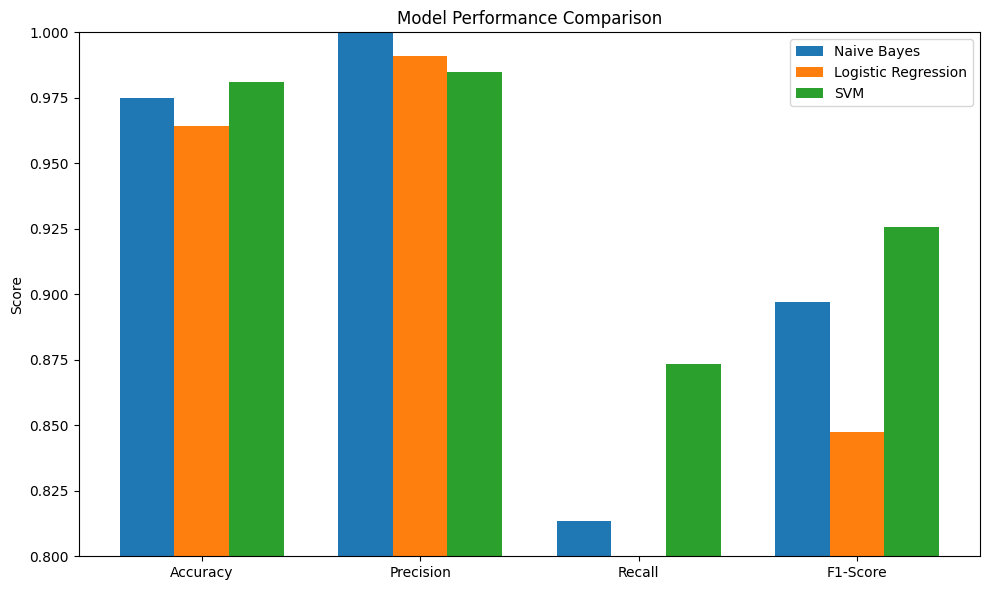

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

labels = list(nb_metrics.keys())
nb_values = list(nb_metrics.values())
log_values = list(log_metrics.values())
svm_values = list(svm_metrics.values())

x = np.arange(len(labels))  # metric positions
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, nb_values, width, label='Naive Bayes')
plt.bar(x, log_values, width, label='Logistic Regression')
plt.bar(x + width, svm_values, width, label='SVM')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, labels)
plt.ylim(0.8, 1.0)
plt.legend()
plt.tight_layout()
plt.show()